<a href="https://colab.research.google.com/github/marinavasqr23/HW2-ICA/blob/main/Homework_2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANÁLISE DE DADOS DATASET "WINE QUALITY"

# 1. IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd
import math
from scipy.stats import skew
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#Neural Network
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. ANÁLISE EXPLORATÓRIA

In [ ]:
# Verify the contents of the directory
!ls "/content/drive/MyDrive/Homework/"

# Load the datasets
dt_whine_red = pd.read_csv("/content/drive/MyDrive/Homework/H2/h2_winequality-red.csv", sep=";")

H1  H2


In [ ]:
dt_whine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [ ]:
# CONFERINDO INCONSISTÊNCIA ENTRE OS VALORES PARA PADRONIZAR OS TIPOS
# Observe que alguns valores estranhos e por isso a coluna está como Object
dt_whine_red['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5',
       '100.333.333.333.333', '9.55', '8.5', '110.666.666.666.667',
       '956.666.666.666.667', '10.55', '8.8', '135.666.666.666.667',
       '11.95', '9.95', '923.333.333.333.333', '9.25', '9.05', '10.75'],
      dtype=object)

In [ ]:
# Lista com os valores a serem corrigidos e suas substituições
dict_whine_red = {
    '100.333.333.333.333': '100',
    '110.666.666.666.667': '110',
    '956.666.666.666.667': '956',
    '135.666.666.666.667': '135',
    '923.333.333.333.333': '923'
}

In [ ]:
# Substituindo os valores
dt_whine_red['alcohol'] = dt_whine_red['alcohol'].replace(dict_whine_red)

In [ ]:
# Valores substituídos
dt_whine_red['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5', '100',
       '9.55', '8.5', '110', '956', '10.55', '8.8', '135', '11.95',
       '9.95', '923', '9.25', '9.05', '10.75'], dtype=object)

In [ ]:
# Alterando para numeric
dt_whine_red['alcohol'] = pd.to_numeric(dt_whine_red['alcohol'])

In [ ]:
# Dividindo os  valores substituídos
dt_whine_red['alcohol'] = np.where(
    dt_whine_red['alcohol'] >= 100,
    dt_whine_red['alcohol'] / 100,
    dt_whine_red['alcohol']
)

In [ ]:
dt_whine_red['alcohol'].unique()

array([ 9.4 ,  9.8 , 10.  ,  9.5 , 10.5 ,  9.2 ,  9.9 ,  9.1 ,  9.3 ,
        9.  ,  9.7 , 10.1 , 10.6 ,  9.6 , 10.8 , 10.3 , 13.1 , 10.2 ,
       10.9 , 10.7 , 12.9 , 10.4 , 13.  , 14.  , 11.5 , 11.4 , 12.4 ,
       11.  , 12.2 , 12.8 , 12.6 , 12.5 , 11.7 , 11.3 , 12.3 , 12.  ,
       11.9 , 11.8 ,  8.7 , 13.3 , 11.2 , 11.6 , 11.1 , 13.4 , 12.1 ,
        8.4 , 12.7 , 14.9 , 13.2 , 13.6 , 13.5 ,  1.  ,  9.55,  8.5 ,
        1.1 ,  9.56, 10.55,  8.8 ,  1.35, 11.95,  9.95,  9.23,  9.25,
        9.05, 10.75])

In [ ]:
dt_whine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dt_whine_red.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,10.397805,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,9.664060,0.154386,0.169507,1.159925,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,1.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,14.900000,8.000000


2.1. Histograma dos Preditores

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Função para escurecer uma cor
def darken_color(color, amount=0.4):
    rgb = mcolors.to_rgb(color)
    darker = [max(0, c - amount * c) for c in rgb]
    return darker

def histogram_frequency(dataset, bins=8):
    predictors_columns = dataset.columns[:11]

    fig, axs = plt.subplots(3, 4, figsize=(12, 10))
    axs = axs.flatten()

    colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#DDA0DD', '#FFFACD',
              '#F0E68C', '#E6E6FA', '#F5DEB3', '#B0E0E6', '#FFDAB9', '#DA70D6']

    for i, column in enumerate(predictors_columns):
        data = dataset[column]

        sns.histplot(
            data,
            bins=bins,
            kde=True,
            color=colors[i],
            edgecolor='black',
            alpha=0.7,
            ax=axs[i]
        )


        kde_line = axs[i].lines[0]
        darker_color = darken_color(colors[i], amount=0.45)
        kde_line.set_color(darker_color)
        kde_line.set_linewidth(2.5)
        kde_line.set_alpha(1)

        axs[i].set_title(column.title())
        axs[i].set_xlabel(column.title())
        axs[i].set_ylabel("Contagem")
        axs[i].grid(True, alpha=0.3)

    for i in range(len(predictors_columns), len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()


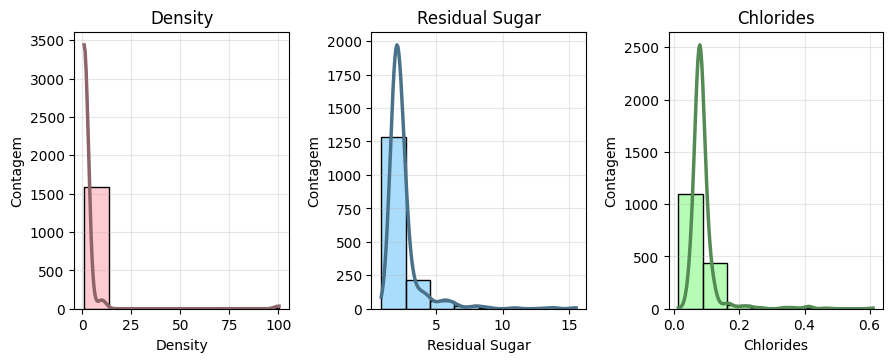

In [ ]:
histogram_frequency(dt_whine_red[['density', 'residual sugar','chlorides']])


2.2. Calculando os valores da Média, Desvio Padrão e Assimetria de cada preditor

In [ ]:
def statistics_values(dataset):
    values = []
    predictors_columns = dataset.columns[:11]

    for column in predictors_columns:
        mean = dataset[column].mean() # Média
        std_dev = dataset[column].std() # Desvio padrão
        skewness = dataset[column].skew() # Assimetria

        values.append({
            "Preditor": column,
            "Média (µ)": round(mean, 4),
            "Desvio Padrão (σ)": round(std_dev, 4),
            "Assimetria (γ)": round(skewness, 4)
        })

    results = pd.DataFrame(values)
    return results

table_statistics_red = statistics_values(dt_whine_red)


Podemos observar alta assimetria nos seguintes preditores:
- free sulfur dioxide
- total sulfur dioxide
- density
- sulphates

In [ ]:
print(table_statistics_red)

                Preditor  Média (µ)  Desvio Padrão (σ)  Assimetria (γ)
0          fixed acidity     8.3196             1.7411          0.9828
1       volatile acidity     0.5278             0.1791          0.6716
2            citric acid     0.2710             0.1948          0.3183
3         residual sugar     2.5388             1.4099          4.5407
4              chlorides     0.0875             0.0471          5.6803
5    free sulfur dioxide    15.8749            10.4602          1.2506
6   total sulfur dioxide    46.4678            32.8953          1.5155
7                density     2.2087             9.6641          9.8039
8                     pH     3.3111             0.1544          0.1937
9              sulphates     0.6581             0.1695          2.4287
10               alcohol    10.3978             1.1599         -0.5768


# 3.PRÉ PROCESSAMENTO




3.2. Divisão entre Conjunto de Treino e Teste e Reduzindo a Assimetria

In [ ]:
# Separando preditores (X) e variável alvo (y)
X = dt_whine_red.drop('quality', axis=1)
y = dt_whine_red['quality']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criando o transformador
pt = PowerTransformer(method='yeo-johnson')

# Transformação correta
X_train_transf = pt.fit_transform(X_train)
X_test_transf = pt.transform(X_test)

X_train_transf = pd.DataFrame(X_train_transf, columns=X_train.columns)
X_test_transf = pd.DataFrame(X_test_transf, columns=X_test.columns)

print("===== SKEWNESS ANTES =====")
print(X_train.skew(), "\n")

print("===== SKEWNESS DEPOIS =====")
print(X_train_transf.skew())

===== SKEWNESS ANTES =====
fixed acidity           0.964506
volatile acidity        0.744729
citric acid             0.313905
residual sugar          4.564529
chlorides               5.571477
free sulfur dioxide     1.198835
total sulfur dioxide    1.385318
density                 9.823774
pH                      0.197788
sulphates               2.591999
alcohol                -0.881183
dtype: float64 

===== SKEWNESS DEPOIS =====
fixed acidity           0.000261
volatile acidity        0.001181
citric acid             0.016239
residual sugar         -0.017593
chlorides              -0.168916
free sulfur dioxide    -0.012305
total sulfur dioxide   -0.004827
density                 4.743814
pH                     -0.003082
sulphates               0.025771
alcohol                 0.349611
dtype: float64


In [ ]:

def plot_correlation_matrix(df, title="Matriz de Correlação"):
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        df.corr(),
        annot=True,        # ← mostra os valores
        fmt=".2f",         # ← duas casas decimais
        cmap="coolwarm",
        center=0,
        square=True
    )
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
df_corr = pd.concat([X_train_transf, y_train], axis=1)


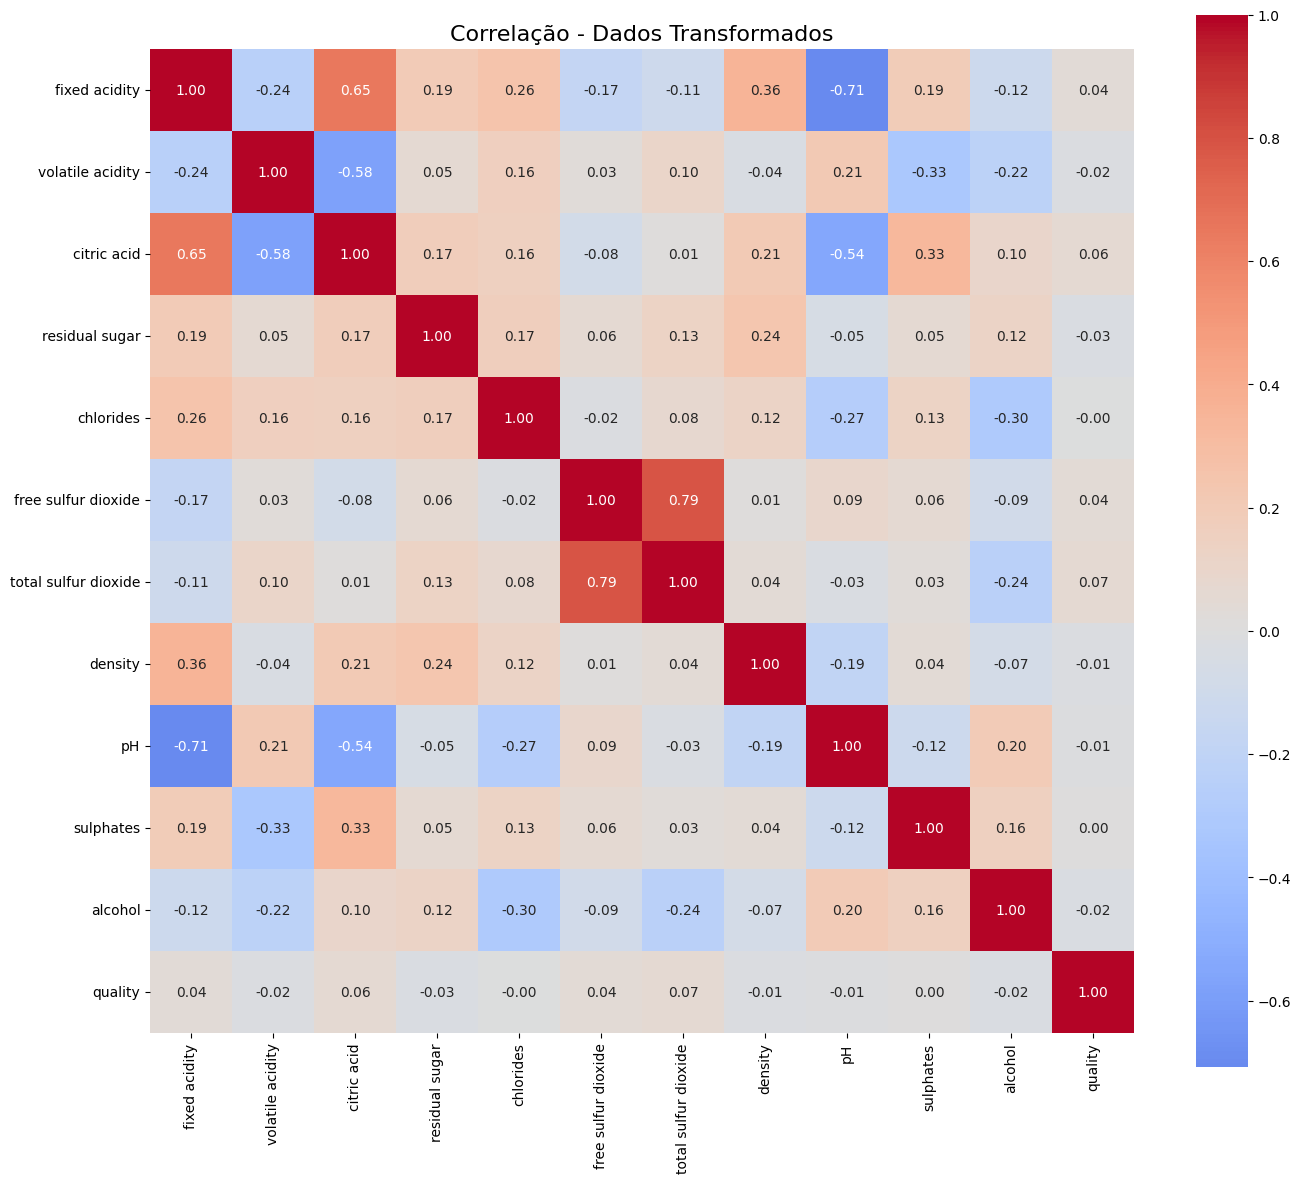

In [ ]:
plot_correlation_matrix(df_corr, title="Correlação - Dados Transformados")


In [ ]:
df_antes = pd.concat([X_train, y_train], axis=1)


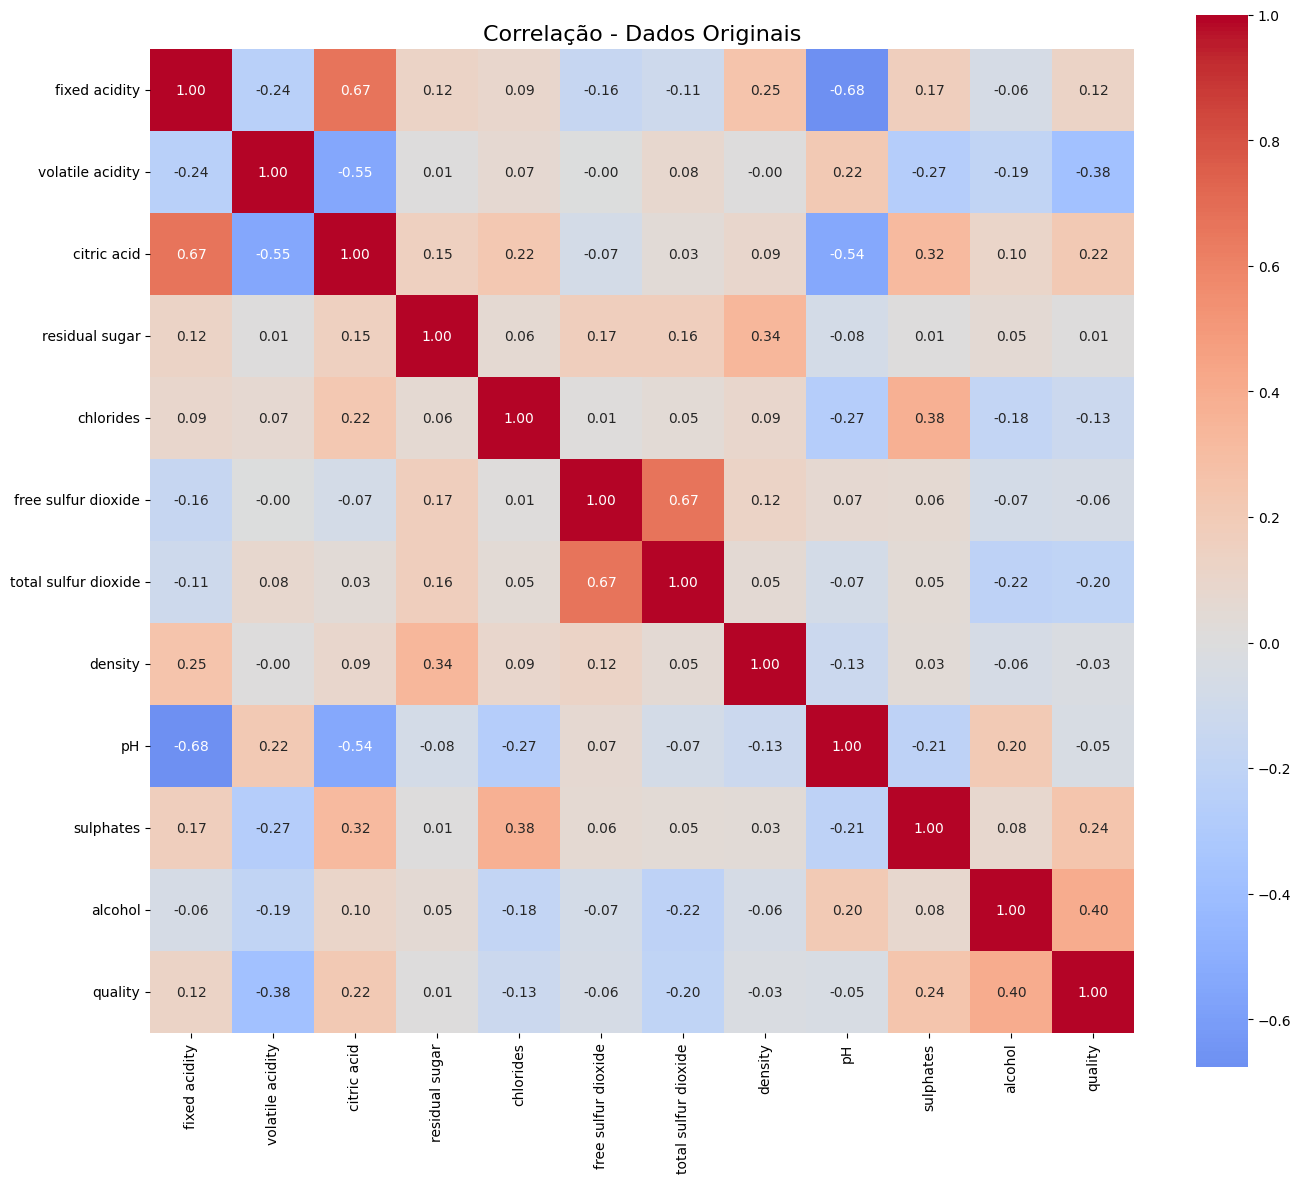

In [ ]:
plot_correlation_matrix(df_antes, title="Correlação - Dados Originais")

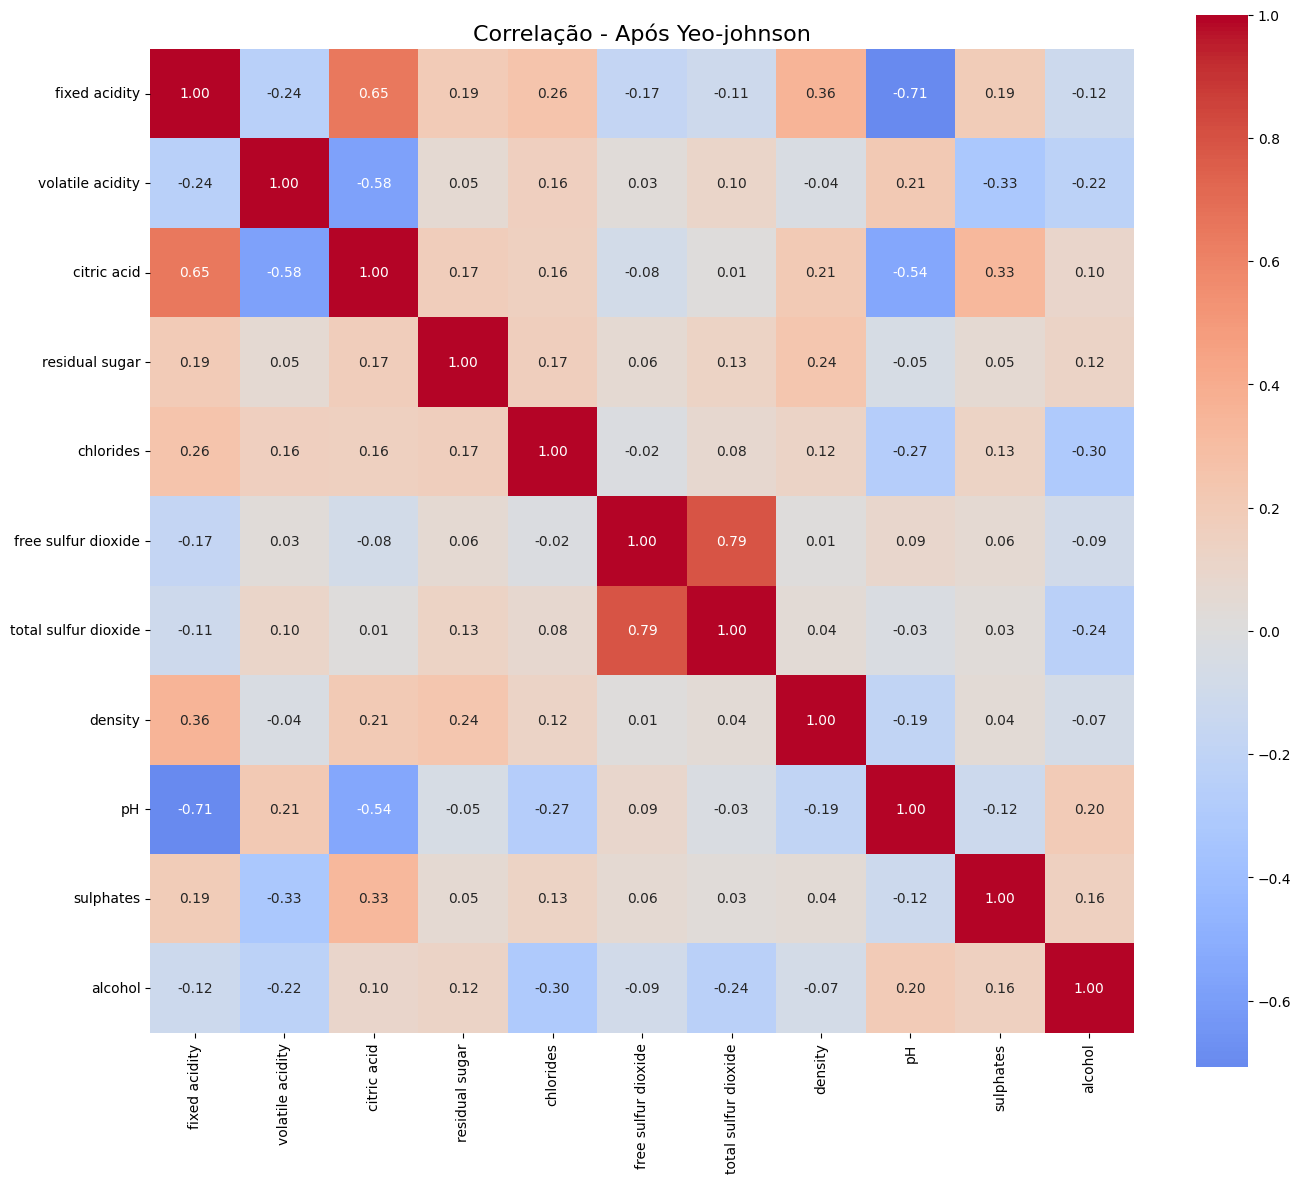

In [ ]:
plot_correlation_matrix(X_train_transf, title="Correlação - Após Yeo-johnson")


3.3 Listar pares com correlação forte e calcular o VIF ( Fator de Inflação da Variância)

In [ ]:
corr = X_train_transf.corr().abs()
threshold = 0.75
pairs = []

cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if corr.iloc[i, j] >= threshold:
            pairs.append((cols[i], cols[j], corr.iloc[i, j]))

print("Pares com |corr| >= 0.75:\n")
for a,b,v in sorted(pairs, key=lambda x: -x[2]):
    print(f"{a}  <->  {b} : {v:.3f}")

Pares com |corr| >= 0.75:

free sulfur dioxide  <->  total sulfur dioxide : 0.789


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)

vif_table = compute_vif(X_train_transf)
vif_table


,feature,VIF
6,total sulfur dioxide,3.280502
0,fixed acidity,3.079818
2,citric acid,2.988653
5,free sulfur dioxide,2.946694
8,pH,2.269628
1,volatile acidity,1.905563
10,alcohol,1.420258
4,chlorides,1.326267
9,sulphates,1.231310
3,residual sugar,1.223298


# 4. Regressão Linear (OLS)

4.1 Adicionando o termo de intercepto

In [ ]:
# Função para adicionar a coluna de 1s (termo de intercepto)
def add_intercept(X):
    X_new = X.copy()
    X_new.insert(0, "intercept", 1)
    return X_new

# Aplicando no treino e teste
X_train_ols = add_intercept(X_train_transf)
X_test_ols  = add_intercept(X_test_transf)

# Convertendo para numpy (OLS manual usa matrizes)
X_train_np = X_train_ols.values
X_test_np  = X_test_ols.values

y_train_np = y_train.values.reshape(-1, 1)
y_test_np  = y_test.values.reshape(-1, 1)


4.2 Implementação da OLS (modelo manual)

In [ ]:
def ols_fit(X, y):
    # Fórmula: beta = (Xᵀ X)^(-1) Xᵀ y
    XT = X.T
    beta = np.linalg.inv(XT @ X) @ XT @ y
    return beta

def ols_predict(X, beta):
    # Previsão: y_hat = X beta
    return X @ beta


4.3 Treinamento e previsão (modelo manual)

In [ ]:
# Treinar
beta_manual = ols_fit(X_train_np, y_train_np)

# Previsões no teste
y_pred_manual = ols_predict(X_test_np, beta_manual)


4.4 Avaliação do modelo (RMSE e R²)

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

rmse_manual = rmse(y_test_np, y_pred_manual)
r2_manual = r2_score(y_test_np, y_pred_manual)

print("=== RESULTADOS OLS MANUAL ===")
print("RMSE:", rmse_manual)
print("R²:", r2_manual)


=== RESULTADOS OLS MANUAL ===
RMSE: 0.6174343105987906
R²: 0.41664619768030864


4.5 OLS com Scikit-Learn (para comparação)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train_transf, y_train)

y_pred_sklearn = model.predict(X_test_transf)

rmse_sklearn = rmse(y_test_np, y_pred_sklearn.reshape(-1,1))
r2_sklearn = r2_score(y_test_np, y_pred_sklearn.reshape(-1,1))

print("=== RESULTADOS OLS SKLEARN ===")
print("RMSE:", rmse_sklearn)
print("R²:", r2_sklearn)


=== RESULTADOS OLS SKLEARN ===
RMSE: 0.6174343105987904
R²: 0.41664619768030897


4.6 Validação Cruzada Manual (k-fold)

In [ ]:
from sklearn.model_selection import KFold

def cross_validation_ols(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    rmse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train_fold = X[train_index]
        X_test_fold  = X[test_index]
        y_train_fold = y[train_index]
        y_test_fold  = y[test_index]

        beta = ols_fit(X_train_fold, y_train_fold)
        y_pred = ols_predict(X_test_fold, beta)

        rmse_scores.append(rmse(y_test_fold, y_pred))
        r2_scores.append(r2_score(y_test_fold, y_pred))

    return np.mean(rmse_scores), np.mean(r2_scores)

rmse_cv_manual, r2_cv_manual = cross_validation_ols(X_train_np, y_train_np, k=10)

print("=== CROSS VALIDATION MANUAL (10-fold) ===")
print("RMSE médio:", rmse_cv_manual)
print("R² médio:", r2_cv_manual)


=== CROSS VALIDATION MANUAL (10-fold) ===
RMSE médio: 0.6632900535407382
R² médio: 0.31583322799269914


4.7 Validação Cruzada com Scikit-Learn

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

rmse_cv_sklearn = -cross_val_score(model, X_train_transf, y_train,
                                   scoring="neg_root_mean_squared_error",
                                   cv=10).mean()

r2_cv_sklearn = cross_val_score(model, X_train_transf, y_train,
                                scoring="r2",
                                cv=10).mean()

print("=== CROSS VALIDATION SKLEARN (10-fold) ===")
print("RMSE médio:", rmse_cv_sklearn)
print("R² médio:", r2_cv_sklearn)


=== CROSS VALIDATION SKLEARN (10-fold) ===
RMSE médio: 0.6609982031680344
R² médio: 0.3150219017514242


#5 REGRESSÃO PENALIZADA - IMPLEMENTAÇÃO MANUAL DE CV

5.1 Definição do Espaço de Busca (Lambda/Alpha)

In [ ]:
alphas = np.logspace(-4, 2, 50) # 50 valores de alpha (lambda) entre 0.0001 e 100

# Estruturas para armazenar os resultados
rmse_folds = np.zeros((len(alphas), 5)) # 5 folds
r2_folds = np.zeros((len(alphas), 5))

# Configuração da Validação Cruzada (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Iniciando 5-fold Cross-Validation Manual para Ridge...")
for i, alpha in enumerate(alphas):

    # K-Fold Loop
    for j, (train_index, val_index) in enumerate(kf.split(X_train_transf)):
        X_train_fold, X_val_fold = X_train_transf.iloc[train_index], X_train_transf.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Treinar o modelo Ridge com o alpha atual
        ridge_manual = Ridge(alpha=alpha, random_state=42)
        ridge_manual.fit(X_train_fold, y_train_fold)

        # Previsão no conjunto de Validação
        y_pred_val = ridge_manual.predict(X_val_fold)

        # Calcular e armazenar as métricas
        rmse_folds[i, j] = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
        r2_folds[i, j] = r2_score(y_val_fold, y_pred_val)

# Calculando a média das métricas para cada alpha
mean_rmse_cv = np.mean(rmse_folds, axis=1)
mean_r2_cv = np.mean(r2_folds, axis=1)

# Encontrando o Alpha Ótimo
best_alpha_manual = alphas[np.argmin(mean_rmse_cv)]
print(f"\nMelhor Alpha (Lambda) pelo CV Manual: {best_alpha_manual:.6f}")

# Treinando o modelo final com o melhor alpha e testando
final_ridge_manual = Ridge(alpha=best_alpha_manual, random_state=42)
final_ridge_manual.fit(X_train_transf, y_train)
y_pred_manual = final_ridge_manual.predict(X_test_transf)

rmse_manual = np.sqrt(mean_squared_error(y_test, y_pred_manual))
r2_manual = r2_score(y_test, y_pred_manual)

print(f"Resultado no Teste (CV Manual):")
print(f"RMSE: {rmse_manual:.4f}")
print(f"R²: {r2_manual:.4f}")

Iniciando 5-fold Cross-Validation Manual para Ridge...

Melhor Alpha (Lambda) pelo CV Manual: 75.431201
Resultado no Teste (CV Manual):
RMSE: 0.6199
R²: 0.4121


5.2 Plotando o perfil de Cross-Validation (RMSE e R^2)

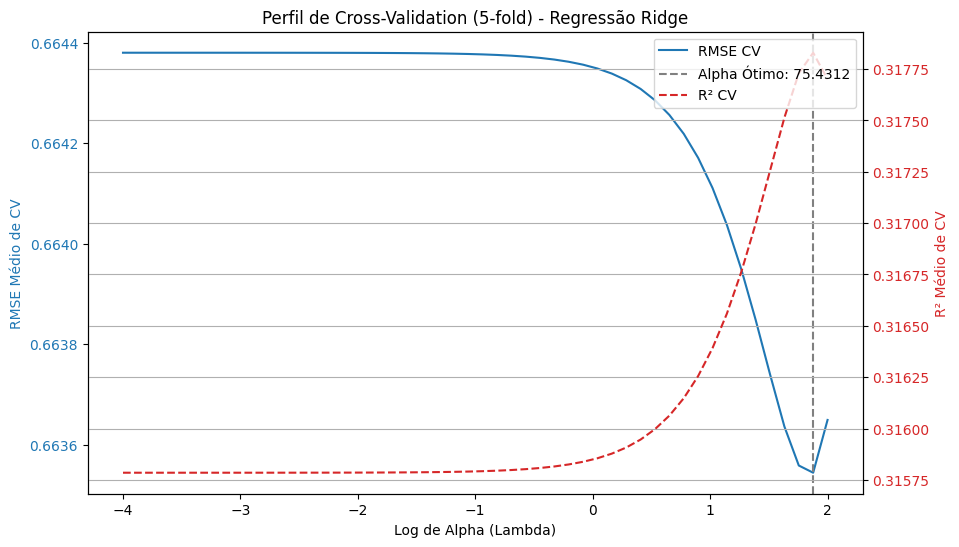

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE (eixo esquerdo)
color = 'tab:blue'
ax1.set_xlabel('Log de Alpha (Lambda)')
ax1.set_ylabel('RMSE Médio de CV', color=color)
ax1.plot(np.log10(alphas), mean_rmse_cv, color=color, label='RMSE CV')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(np.log10(best_alpha_manual), color='gray', linestyle='--', label=f'Alpha Ótimo: {best_alpha_manual:.4f}')

# Plot R² (eixo direito)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R² Médio de CV', color=color)
ax2.plot(np.log10(alphas), mean_r2_cv, color=color, linestyle='--', label='R² CV')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Perfil de Cross-Validation (5-fold) - Regressão Ridge')
plt.grid(True)
plt.show()

5.3 GRIDSEARCHCV (Built-in)

In [ ]:
# --- Ridge (Comparação) ---
ridge_model = Ridge(random_state=42)
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid={'alpha': alphas},
                          scoring='neg_mean_squared_error', cv=5, verbose=0)
ridge_grid.fit(X_train_transf, y_train)

best_ridge_builtin = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_builtin.predict(X_test_transf)
rmse_ridge_builtin = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge_builtin = r2_score(y_test, y_pred_ridge)

print(f"--- Regressão Ridge (Built-in GridSearchCV) ---")
print(f"Melhor Alpha: {ridge_grid.best_params_['alpha']:.6f}")
print(f"RMSE (Teste): {rmse_ridge_builtin:.4f}")
print(f"R² (Teste): {r2_ridge_builtin:.4f}")

# --- Lasso ---
lasso_model = Lasso(random_state=42, max_iter=10000)
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid={'alpha': alphas},
                          scoring='neg_mean_squared_error', cv=5, verbose=0)
lasso_grid.fit(X_train_transf, y_train)

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_transf)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\n--- Regressão Lasso (Built-in GridSearchCV) ---")
print(f"Melhor Alpha: {lasso_grid.best_params_['alpha']:.6f}")
print(f"RMSE (Teste): {rmse_lasso:.4f}")
print(f"R² (Teste): {r2_lasso:.4f}")

--- Regressão Ridge (Built-in GridSearchCV) ---
Melhor Alpha: 56.898660
RMSE (Teste): 0.6192
R² (Teste): 0.4133

--- Regressão Lasso (Built-in GridSearchCV) ---
Melhor Alpha: 0.000543
RMSE (Teste): 0.6175
R² (Teste): 0.4165


#6 PCR (COMPONENTES PRINCIPAIS) E PLS (MÍNIMOS QUADRADOS PARCIAIS)

In [ ]:
# O número máximo de componentes é o número de features
max_components = X_train_transf.shape[1]
n_components = np.arange(1, max_components + 1)

In [ ]:
# Lista de métricas: Usamos neg_mean_squared_error para otimização e 'r2' para o perfil de CV.
scoring_metrics = ['neg_mean_squared_error', 'r2']

6.1 Regressão por Componentes Principais (PCR)

In [ ]:
pcr_pipe = Pipeline([
    ('pca', PCA()),
    ('regressor', LinearRegression())
])

# CORREÇÃO APLICADA: Passamos a lista de scoring_metrics e especificamos 'refit'
pcr_grid = GridSearchCV(estimator=pcr_pipe, param_grid={'pca__n_components': n_components},
                        scoring=scoring_metrics, # Lista de métricas
                        cv=5, verbose=0, return_train_score=True, refit='neg_mean_squared_error')
pcr_grid.fit(X_train_transf, y_train)

# Coletando resultados para o Perfil de CV
pcr_results = pcr_grid.cv_results_
# CORREÇÃO APLICADA: A chave do RMSE agora é 'mean_test_neg_mean_squared_error'
pcr_rmse_cv = np.sqrt(-pcr_results['mean_test_neg_mean_squared_error'])
pcr_r2_cv = pcr_results['mean_test_r2'] # Agora esta chave estará disponível!

best_pcr_components = pcr_grid.best_params_['pca__n_components']
best_pcr_model = pcr_grid.best_estimator_
y_pred_pcr = best_pcr_model.predict(X_test_transf)
rmse_pcr = np.sqrt(mean_squared_error(y_test, y_pred_pcr))
r2_pcr = r2_score(y_test, y_pred_pcr)

print(f"--- Regressão por Componentes Principais (PCR) ---")
print(f"Melhor Número de Componentes: {best_pcr_components}")
print(f"RMSE (Teste): {rmse_pcr:.4f}")
print(f"R² (Teste): {r2_pcr:.4f}")

--- Regressão por Componentes Principais (PCR) ---
Melhor Número de Componentes: 10
RMSE (Teste): 0.6175
R² (Teste): 0.4166


6.2 Mínimos Quadrados Parciais (PLS - Partial Least Squares)

In [ ]:
pls_model = PLSRegression(scale=False)

# CORREÇÃO APLICADA: Passamos a lista de scoring_metrics e especificamos 'refit'
pls_grid = GridSearchCV(estimator=pls_model, param_grid={'n_components': n_components},
                        scoring=scoring_metrics, # Lista de métricas
                        cv=5, verbose=0, return_train_score=True, refit='neg_mean_squared_error')
pls_grid.fit(X_train_transf, y_train)

# Coletando resultados para o Perfil de CV
pls_results = pls_grid.cv_results_
# CORREÇÃO APLICADA: A chave do RMSE agora é 'mean_test_neg_mean_squared_error'
pls_rmse_cv = np.sqrt(-pls_results['mean_test_neg_mean_squared_error'])
pls_r2_cv = pls_results['mean_test_r2'] # Agora esta chave estará disponível!

best_pls_components = pls_grid.best_params_['n_components']
best_pls_model = pls_grid.best_estimator_
y_pred_pls = best_pls_model.predict(X_test_transf)
rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
r2_pls = r2_score(y_test, y_pred_pls)

print(f"\n--- Mínimos Quadrados Parciais (PLS) ---")
print(f"Melhor Número de Componentes: {best_pls_components}")
print(f"RMSE (Teste): {rmse_pls:.4f}")
print(f"R² (Teste): {r2_pls:.4f}")


--- Mínimos Quadrados Parciais (PLS) ---
Melhor Número de Componentes: 6
RMSE (Teste): 0.6171
R² (Teste): 0.4172


6.3 Plotando o Perfil de Cross-Validation (RMSE) para PCR e PLS

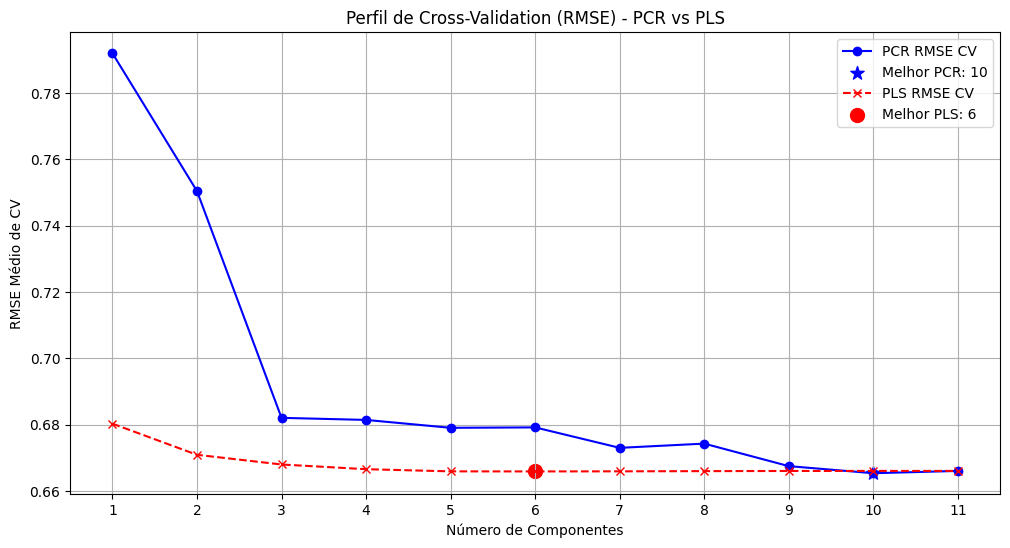

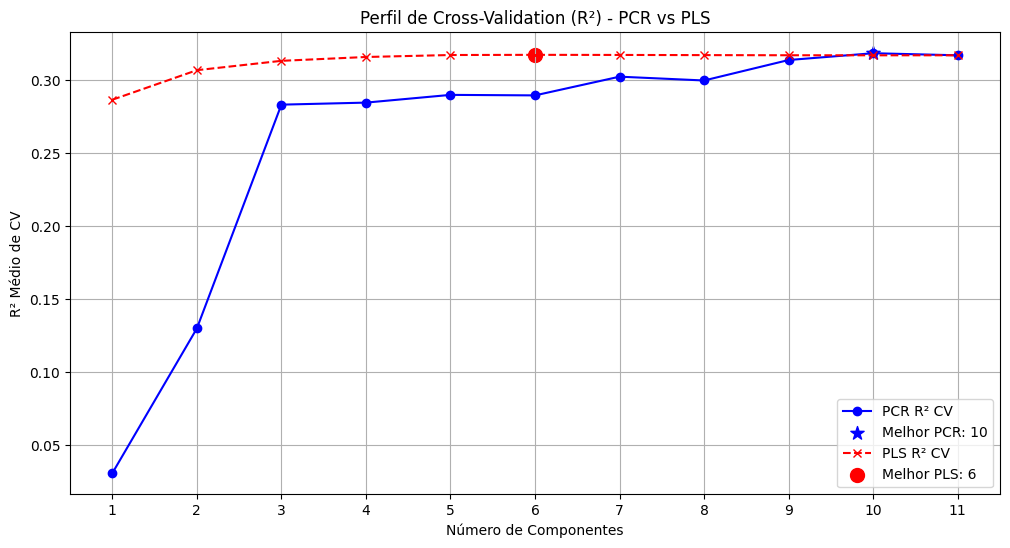

In [ ]:
plt.figure(figsize=(12, 6))

# Plot RMSE para PCR
plt.plot(n_components, pcr_rmse_cv, marker='o', linestyle='-', color='blue', label='PCR RMSE CV')
plt.scatter(best_pcr_components, np.min(pcr_rmse_cv), color='blue', s=100, marker='*', label=f'Melhor PCR: {best_pcr_components}')

# Plot RMSE para PLS
plt.plot(n_components, pls_rmse_cv, marker='x', linestyle='--', color='red', label='PLS RMSE CV')
plt.scatter(best_pls_components, np.min(pls_rmse_cv), color='red', s=100, marker='o', label=f'Melhor PLS: {best_pls_components}')


plt.xlabel('Número de Componentes')
plt.ylabel('RMSE Médio de CV')
plt.title('Perfil de Cross-Validation (RMSE) - PCR vs PLS')
plt.legend()
plt.grid(True)
plt.xticks(n_components)
plt.show()

# Plotando o Perfil de Cross-Validation (R²) para PCR e PLS
plt.figure(figsize=(12, 6))

# Plot R² para PCR
plt.plot(n_components, pcr_r2_cv, marker='o', linestyle='-', color='blue', label='PCR R² CV')
plt.scatter(best_pcr_components, np.max(pcr_r2_cv), color='blue', s=100, marker='*', label=f'Melhor PCR: {best_pcr_components}')

# Plot R² para PLS
plt.plot(n_components, pls_r2_cv, marker='x', linestyle='--', color='red', label='PLS R² CV')
plt.scatter(best_pls_components, np.max(pls_r2_cv), color='red', s=100, marker='o', label=f'Melhor PLS: {best_pls_components}')

plt.xlabel('Número de Componentes')
plt.ylabel('R² Médio de CV')
plt.title('Perfil de Cross-Validation (R²) - PCR vs PLS')
plt.legend()
plt.grid(True)
plt.xticks(n_components)
plt.show()